In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

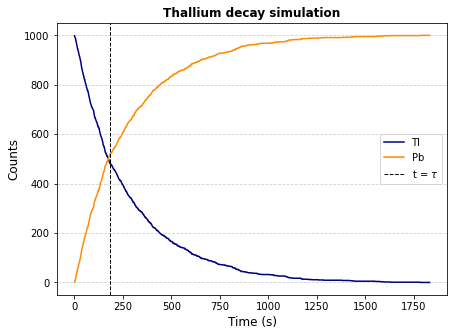

In [2]:
tau = 3.052*60

def p(t):
    return 1 - 2**(-t/tau)

N_init = 1000
step = 1 #second
time_array = np.arange(0, tau*10, step) #time of the observation

Tl = np.zeros(len(time_array))
Pb = np.zeros(len(time_array))

decays = 0
for i in range(len(time_array)):
    #decays = 0
    prob = p(1)
    for n in range(N_init):
        u = np.random.uniform(0, 1)
        if u < prob: 
            decays += 1
            N_init -= 1
    Tl[i] = N_init
    Pb[i] = decays
    
fig = plt.figure( figsize = (7,5) )
plt.plot(time_array, Tl, c = "navy", label = "Tl")
plt.plot(time_array, Pb, c = "darkorange", label = "Pb")
plt.title("Thallium decay simulation", fontweight = "bold", fontsize = 12)
plt.xlabel("Time (s)", fontsize = 12)
plt.ylabel("Counts", fontsize = 12)
plt.axvline(tau, linestyle = "--", linewidth = 1,
            c = "black", label = r"t = $\tau$")
plt.grid( axis = "y", alpha = 0.6, linestyle = "--")
plt.legend()
plt.show()


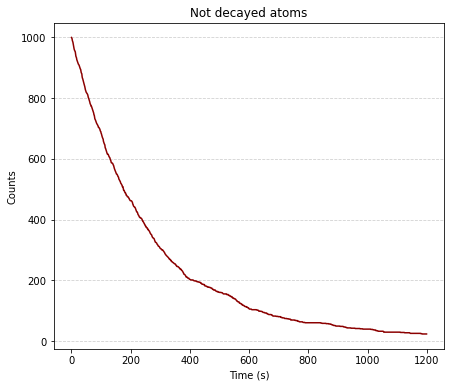

In [3]:
tau = 3.052*60
N = 1000

def pdf(t):
    return 2**(-t/tau)*np.log(2/tau)

def qdf(a):
    return -np.log(1-a)*tau/np.log(2)

time_range = range(0, 1200)
u = np.random.uniform(0, 1, N)
sampled_times = qdf(u)

not_dec = np.zeros(len(time_range))
for t in time_range:
    not_dec[t] = len(sampled_times[sampled_times > t])
    
fig = plt.figure(figsize=(7,6))
plt.plot(time_range, not_dec, c = "darkred")
plt.xlabel("Time (s)")
plt.ylabel("Counts")
plt.title("Not decayed atoms")
plt.grid( axis = "y", alpha = 0.6, linestyle = "--")
plt.show()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Compute the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
np.random.seed(123)

N = 10**6
a0 = 5.292e-11 #m

e = -1.602e-19 #C
E = 7.7e6 * np.abs(e)#J
Z = 79
eps0 = 8.854e-12 #F/m

sigma = a0/100.
beam_x = np.random.normal(loc = 0, scale = sigma, size = N)
beam_y = np.random.normal(loc = 0.0, scale = sigma, size = N)

def angle(b_x, b_y):
    b = np.sqrt(b_x**2 + b_y**2)
    return 2 * np.arctan( (Z * e**2) / (2 * np.pi * eps0 * E * b) ) 

angles = angle(beam_x, beam_y)

print("Fraction of particles that bounce back:", len(angles[angles > np.pi/2])*100/N, "%")

Fraction of particles that bounce back: 0.163 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Integral with hit or miss method: 1.450794 +/- 0.0008926280129841322
Integral with mean value method: 1.4515436403769983 +/- 0.0005269841373356117


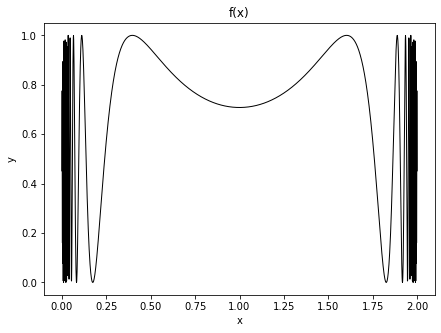

In [5]:
def f(x):
    return np.sin(1 / (x * (2-x) ) )**2 

x_range = np.arange(0+0.001, 2, 0.001)

fig = plt.figure(figsize = (7,5))
plt.plot(x_range, f(x_range), c = "black", linewidth = 1)
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.show


def hit_miss_f(N):
    a, b, h = 0, 2, 1
    A_rect = (b-a)*h
    x_rand_p = np.random.uniform(a, b, N)
    y_rand_p = np.random.uniform(0, h, N)
    hit = y_rand_p[y_rand_p < f(x_rand_p)].shape[0]
    p = hit / N
    I = A_rect * p
    err = A_rect * np.sqrt(p*(1-p)/N)
    return I, err

N = 10**6
hit_miss_Int, hit_miss_err = hit_miss_f(N)
print("Integral with hit or miss method:", hit_miss_Int, "+/-", hit_miss_err)

def mean_value_f(N):
    a, b = 0, 2
    x_rand_p = np.random.uniform(a, b, N)
    y = f(x_rand_p)
    A = (b-a) * np.mean(y)
    err = (b-a) * np.std(y) / np.sqrt(N)
    return A, err

mean_value_Int, mean_value_err = mean_value_f(N)
print("Integral with mean value method:", mean_value_Int, "+/-", mean_value_err)

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
np.random.seed(123)
def f(v):
    if np.sum(v**2) <= 1: return 1
    else: return 0
    
N = 10**5
dim = [2, 10] #list with dimensions 

for d in dim:
    vec = np.random.uniform(-1., 1., size = (N,d))
    y = []
    for i in vec:
        y.append(f(i))
    I_dim = 2.**d * np.mean(y)
    print(r"The integral in {}D is about".format(d), I_dim)

The integral in 2D is about 3.14592
The integral in 10D is about 2.8672


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [7]:
def w(x):
    return 1 / np.sqrt(x)

def int_w(a, b):
    return 2 * (np.sqrt(b) - np.sqrt(a))

def qdf_w(a):
    return a**2

def f(x):
    return w(x) / (np.exp(x) + 1)

N = 10**6
x = np.random.uniform(0, 1, N)
x_w = qdf_w(x)
I = np.mean( f(x_w) / w(x_w) ) * int_w(0 , 1)
print("The integral result is about:", I)

The integral result is about: 0.8388431191495429
